In [174]:
#ms = 20220410T0130  
#dt = datetime.fromtimestamp(ms/1000.0)
#dt

In [ ]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from statistics import mean

api_key = "APCAF6OLCGOVGNUS"
url_interest = f'https://www.alphavantage.co/query?function=FEDERAL_FUNDS_RATE&interval=monthlytopics&apikey={api_key}'
url_cpi = f'https://www.alphavantage.co/query?function=CPI&interval=monthly&apikey={api_key}'
url_coffee = f'https://www.alphavantage.co/query?function=COFFEE&interval=monthly&apikey={api_key}'

r1 = requests.get(url_interest)
r2 = requests.get(url_cpi)
r3 = requests.get(url_coffee)

interest_rate = r1.json()
cpi_us = r2.json()
coffee = r3.json()


print(interest_rate)
print(cpi_us)
print(coffee)

In [176]:
#printing the API-Data from Alpha Vantage
interest_rate = pd.DataFrame(interest_rate)
cpi_us = pd.DataFrame(cpi_us)
coffee = pd.DataFrame(coffee)

In [ ]:
#extracting Data from nested dict (interest rate) Alpha Vantage
values = [item["value"] for item in interest_rate["data"]]
dates = [item["date"] for item in interest_rate["data"]]
print(dates)
print(values)

In [178]:
#create the columns for interest rate
interest_rate["us_interest_rate_%"] = values
interest_rate["Date"] = dates

In [ ]:
interest_rate

In [180]:
interest_rate_clean = interest_rate.drop(columns = ["data", "name", "interval","unit"])    

In [ ]:
interest_rate_clean

In [ ]:
#extracting Data from nested dict (cpi) Alpha Vantage
values2 = [item["value"] for item in cpi_us["data"]]
dates2 = [item["date"] for item in cpi_us["data"]]
print(dates2)
print(values2)

In [183]:
cpi_us["cpi"] = values2
cpi_us["Date"] = dates2

In [ ]:
cpi_us

In [ ]:
cpi_us_clean = cpi_us.drop(columns = ["data", "name", "interval","unit"])
cpi_us_clean

In [ ]:
#extracting Data from nested dict (coffee) Alpha Vantage
values3 = [item["value"] for item in coffee["data"]]
dates3 = [item["date"] for item in coffee["data"]]
print(dates3)
print(values3)

In [187]:
coffee["coffee_price/cents_per_pound"] = values3
coffee["Date"] = dates3

In [ ]:
coffee

In [ ]:
coffee_clean = coffee.drop(columns = ["data", "name", "interval","unit"])

coffee_clean

coffee_clean
cpi_us_clean
interest_rate_clean

-> from API Alpha Vantage
next step -> merge them all

In [ ]:
path_btc = "./btc.csv"   #lokal path // need to be changed  "C:\Users\rk-admin\OneDrive\Desktop\DA_FT_FEB25_Ironhack-Bootcamp\week3\quest\btc.csv"
btc_kaggle = pd.read_csv(path_btc)
print (btc_kaggle.head())


In [ ]:
btc_kaggle_clean = btc_kaggle.drop(columns = ["Volume"])
cpi_us_clean = cpi_us.drop(columns = ["data", "name", "interval","unit"])
print (btc_kaggle_clean.head())



In [192]:
final_df = btc_kaggle_clean
final_df["Date"] = pd.to_datetime(btc_kaggle_clean["Date"])

high_mean = final_df.groupby(final_df["Date"].dt.to_period("M"))["High"].mean()
low_mean = final_df.groupby(final_df["Date"].dt.to_period("M"))["Low"].mean()
open = final_df.groupby(final_df["Date"].dt.to_period("M"))["Open"].first().reset_index()
close = final_df.groupby(final_df["Date"].dt.to_period("M"))["Close"].first().reset_index()

high_mean.index = high_mean.index.to_timestamp()
low_mean.index = low_mean.index.to_timestamp()

open["Date"] = open["Date"].dt.to_timestamp()
close["Date"] = close["Date"].dt.to_timestamp()

high_mean = high_mean.reset_index().rename(columns={"index": "Date"})
low_mean = low_mean.reset_index().rename(columns={"index": "Date"})


In [ ]:
print ("-------------high mean------------")
print(high_mean.head())
print ("----------------------------------")

print ("-------------low mean-------------")
print(low_mean.head())
print ("----------------------------------")

print ("-------------open btc-------------")
print(open.head())
print ("----------------------------------")

print ("-------------close btc-------------")
print(close.head())
print ("-----------------------------------")


In [ ]:

#merging all the parsed data into one table
btc_final = (
    high_mean
    .merge(low_mean, on="Date", how="inner")
    .merge(open, on="Date", how="inner")
    .merge(close, on="Date", how="inner")
)

#filtering by a limit date
limit_lower_date = pd.to_datetime("2010-08-01")
limit_upper_date = pd.to_datetime("2023-12-01")
btc_final = btc_final[btc_final["Date"] >= limit_lower_date]
btc_final = btc_final[btc_final["Date"] <= limit_upper_date]

#sorting by date so the highest date shows first
# btc_final = btc_final.sort_values(by="Date", ascending=False)

#rounding the numbers so it shows only one decimal
btc_final["High"] = btc_final["High"].round(1)
btc_final["Low"] = btc_final["Low"].round(1)

print(btc_final.head())

In [ ]:
coffee_clean["Date"] = pd.to_datetime(coffee_clean["Date"])

coffee_final = coffee_clean[coffee_clean["Date"] >= limit_lower_date]
coffee_final = coffee_final[coffee_final["Date"] <= limit_upper_date]

print(coffee_final)

In [ ]:
cpi_us_clean["Date"] = pd.to_datetime(cpi_us_clean["Date"])

cpi_us_final = cpi_us_clean[cpi_us_clean["Date"] >= limit_lower_date]
cpi_us_final = cpi_us_final[cpi_us_final["Date"] <= limit_upper_date]

print(cpi_us_final)

In [ ]:
interest_rate_clean["Date"] = pd.to_datetime(interest_rate_clean["Date"])

interest_rate_final = interest_rate_clean[interest_rate_clean["Date"] >= limit_lower_date]
interest_rate_final = interest_rate_final[interest_rate_final["Date"] <= limit_upper_date]

print(interest_rate_final)


In [ ]:
result = (
    btc_final
    .merge(cpi_us_final, on="Date", how="inner")
    .merge(coffee_final, on="Date", how="inner")
    .merge(interest_rate_final, on="Date", how="inner")
)

print(result)

In [199]:
path_coffee_btc = "./gtrends_btc_coffee_xls.xlsx"
coffee_btc = pd.read_excel(path_coffee_btc)

coffee_btc_clean = coffee_btc.rename(columns={"month": "Date"})

coffee_btc_clean["Date"] = pd.to_datetime((coffee_btc_clean["Date"]))

print(coffee_btc_clean.head())

        Date  google_trends_btc  google_trends_coffee
0 2010-01-01                  0                    18
1 2010-02-01                  0                    19
2 2010-03-01                  0                    18
3 2010-04-01                  0                    18
4 2010-05-01                  0                    17


In [200]:
coffee_btc_final = coffee_btc_clean[coffee_btc_clean["Date"] >= limit_lower_date]
coffee_btc_final = coffee_btc_final[coffee_btc_final["Date"] <= limit_upper_date]

coffee_btc_final = coffee_btc_final.sort_values(by="Date", ascending=False)

print(coffee_btc_final)

          Date  google_trends_btc  google_trends_coffee
167 2023-12-01                 24                    49
166 2023-11-01                 20                    47
165 2023-10-01                 18                    44
164 2023-09-01                 15                    46
163 2023-08-01                 17                    44
..         ...                ...                   ...
11  2010-12-01                  0                    22
10  2010-11-01                  0                    20
9   2010-10-01                  0                    18
8   2010-09-01                  0                    18
7   2010-08-01                  0                    18

[161 rows x 3 columns]


In [ ]:
result = pd.merge(result, coffee_btc_final, on="Date", how="inner")

result = result.sort_values(by="Date", ascending=False)

print(result.head())

In [ ]:
result["monthly_mean_btc"] = (result["High"] + result["Low"]) / 2


# Reordering for comparing the difference with the one before
result = result.sort_values(by="Date", ascending=True)

result["change_btc%"] = result["Open"].pct_change() *100
result["change_btc%"] = result["change_btc%"].fillna(0)

result = result.sort_values(by="Date", ascending=False)

print(result.head())

In [ ]:
result = result.sort_values(by="Date", ascending=True)

result["change_trends_btc%"] = result["google_trends_btc"].pct_change() *100
result["change_trends_btc%"] = result["change_trends_btc%"].fillna(0)

result = result.sort_values(by="Date", ascending=False)

print(result.head())

In [ ]:
result = result.sort_values(by="Date", ascending=True)

# coffee_price/cents_per_pound is a string for some reason so i convert it into a number
result["coffee_price/cents_per_pound"] = pd.to_numeric(result["coffee_price/cents_per_pound"])

result["change_coffee_price%"] = result["coffee_price/cents_per_pound"].pct_change() *100
result["change_coffee_price%"] = result["change_coffee_price%"].fillna(0)

result = result.sort_values(by="Date", ascending=False)

print(result.head())

In [ ]:
result["cpi"] = pd.to_numeric(result["cpi"])

result = result.sort_values(by="Date", ascending=True)

result["change_trends_coffee%"] = result["google_trends_coffee"].pct_change() *100
result["change_trends_coffee%"] = result["change_trends_coffee%"].fillna(0)

result["cpi_change_%"] = result["cpi"].pct_change() *100
result["cpi_change_%"] = result["cpi_change_%"].fillna(0)

result = result.sort_values(by="Date", ascending=False)

print(result.head())


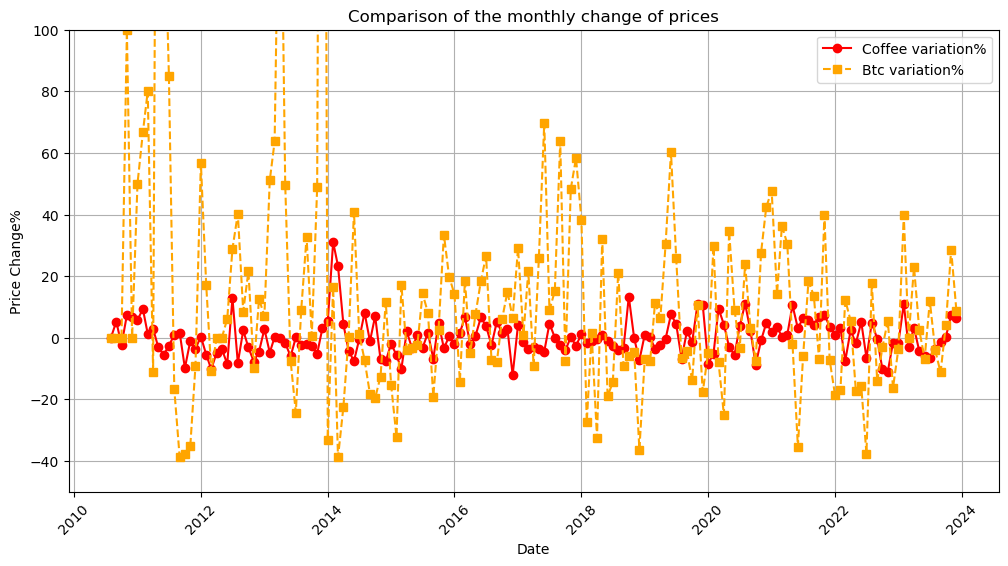

In [233]:
import matplotlib.pyplot as plt

# Ordering date so it prints the oldest at the left
result = result.sort_values(by="Date", ascending=True)


# Create shape
plt.figure(figsize=(12, 6))

# Coffee graph
plt.plot(result["Date"], result["change_coffee_price%"], marker="o", linestyle="-", color="red", label="Coffee variation%")

# Btc graph
plt.plot(result["Date"], result["change_btc%"], marker="s", linestyle="--", color="orange", label="Btc variation%")

# design
plt.xlabel("Date")
plt.ylabel("Price Change%")
plt.title("Comparison of the monthly change of prices")
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# cutting top values so we can see correctly
plt.ylim(-50, 100)

# show graph
plt.show()



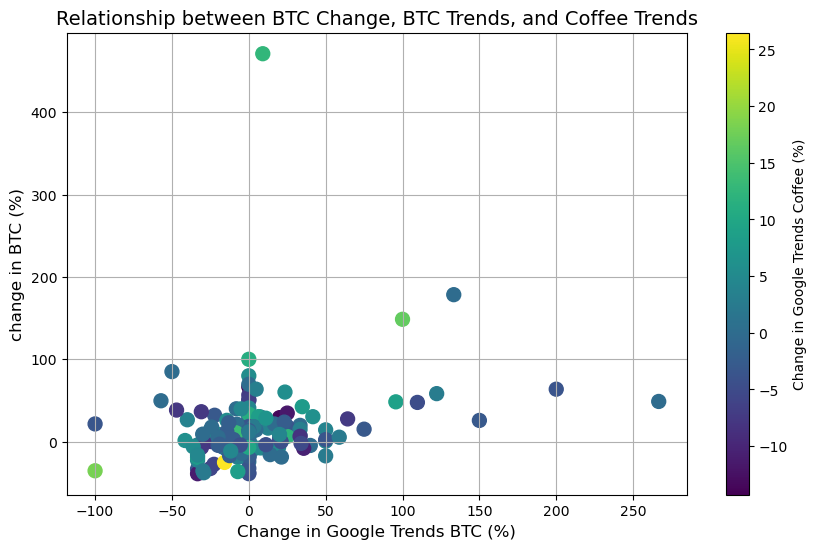

In [208]:

# Dispersion graph
plt.figure(figsize=(10, 6))
scatter = plt.scatter(result["change_trends_btc%"], result["change_btc%"], c=result["change_trends_coffee%"], cmap='viridis', s=100)

# Design 
plt.title('Relationship between BTC Change, BTC Trends, and Coffee Trends', fontsize=14)
plt.xlabel('Change in Google Trends BTC (%)', fontsize=12)
plt.ylabel('change in BTC (%)', fontsize=12)

# Color (for visualitation `change_trends_coffee%`)
plt.colorbar(scatter, label='Change in Google Trends Coffee (%)')

plt.grid(True)
plt.show()


Date     High      Low     Open    Close      cpi  \
160 2023-12-01  43164.3  41713.5  37718.0  38688.8  306.746   
159 2023-11-01  37092.6  35960.9  34657.3  35437.3  307.051   
158 2023-10-01  30155.9  29235.6  26967.4  27983.8  307.671   
157 2023-09-01  26573.9  26041.2  25934.0  25800.7  307.789   
156 2023-08-01  28204.5  27517.8  29230.9  29675.7  307.026   

     coffee_price/cents_per_pound us_interest_rate_%  google_trends_btc  \
160                    210.310476               5.33                 24   
159                    197.433182               5.33                 20   
158                    183.951364               5.33                 18   
157                    183.589048               5.33                 15   
156                    186.346957               5.33                 17   

     google_trends_coffee  monthly_mean_btc  change_btc%  change_trends_btc%  \
160                    49          42438.90     8.831328           20.000000   
159                    47          36526.75    28.515541           11.111111   
158                    44          29695.75     3.984730           20.000000   
157                    46          26307.55   -11.278818          -11.764706   
156                    44          27861.15    -4.072290           -5.555556   

     change_coffee_price%  change_trends_coffee%  
160              6.522356               4.255319  
159              7.329012               6.818182  
158              0.197352              -4.347826  
157             -1.479986               4.545455  
156             -3.693819              -4.347826  


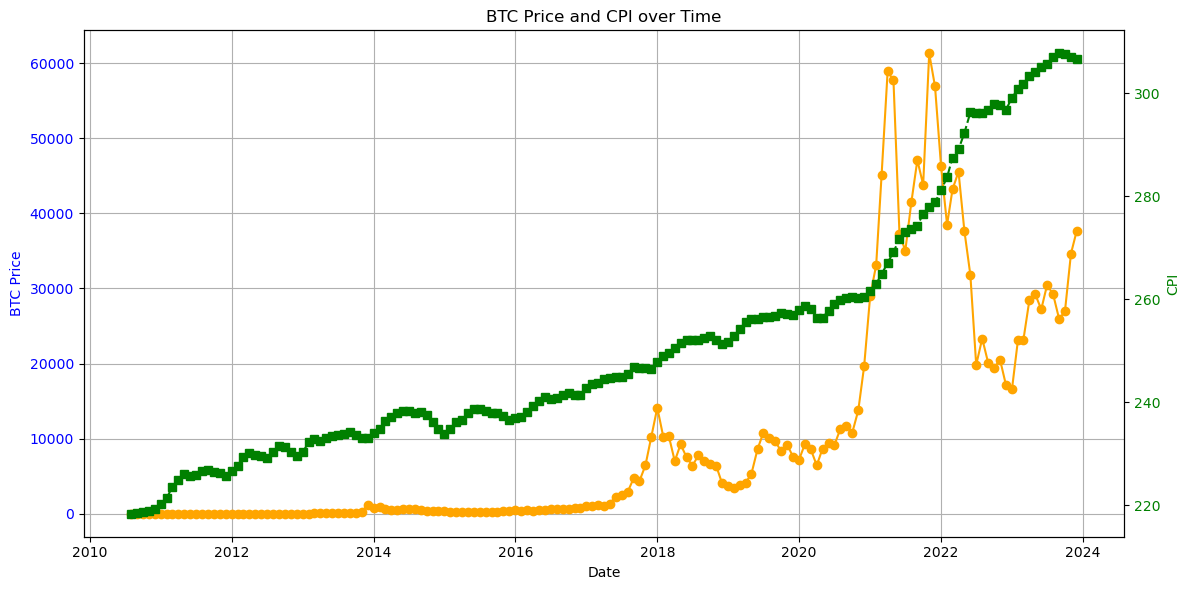

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# First y (BTC price)
ax1.plot(result["Date"], result["Open"], color='orange', label='BTC Price', marker="o", linestyle="-")
ax1.set_xlabel("Date")
ax1.set_ylabel("BTC Price", color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Second y (interest rate) sharing x
ax2 = ax1.twinx()
ax2.plot(result["Date"], result["cpi"], color='green', label='CPI', marker="s", linestyle="--")
ax2.set_ylabel("CPI", color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title("BTC Price and CPI over Time")
plt.xticks(rotation=45)
ax1.grid(True)

plt.tight_layout()
plt.show()

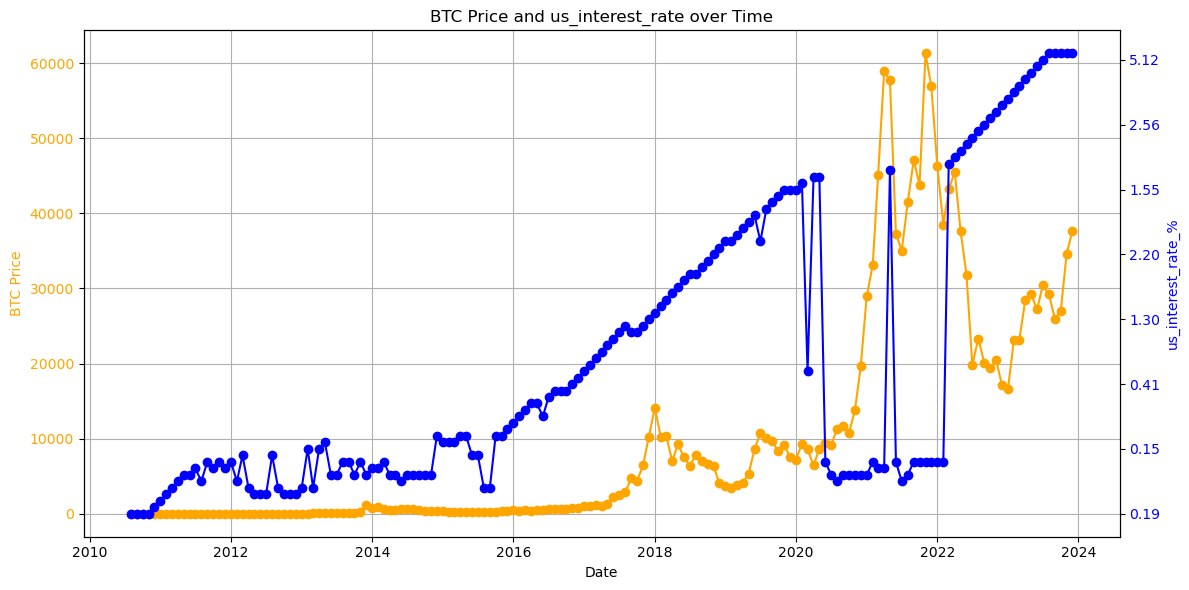

In [239]:
from matplotlib.ticker import MaxNLocator

fig, ax1 = plt.subplots(figsize=(12, 6))

# First y (BTC price)
ax1.plot(result["Date"], result["Open"], color='orange', label='BTC Price', marker="o", linestyle="-")
ax1.set_xlabel("Date")
ax1.set_ylabel("BTC Price", color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Second y (CPI) sharing x
ax2 = ax1.twinx()
ax2.plot(result["Date"], result["us_interest_rate_%"], color='blue', label='CPI', marker="o", linestyle="-")
ax2.set_ylabel("us_interest_rate_%", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax2.yaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=8))

plt.title("BTC Price and us_interest_rate over Time")
plt.xticks(rotation=45)
ax1.grid(True)

plt.tight_layout()
plt.show()

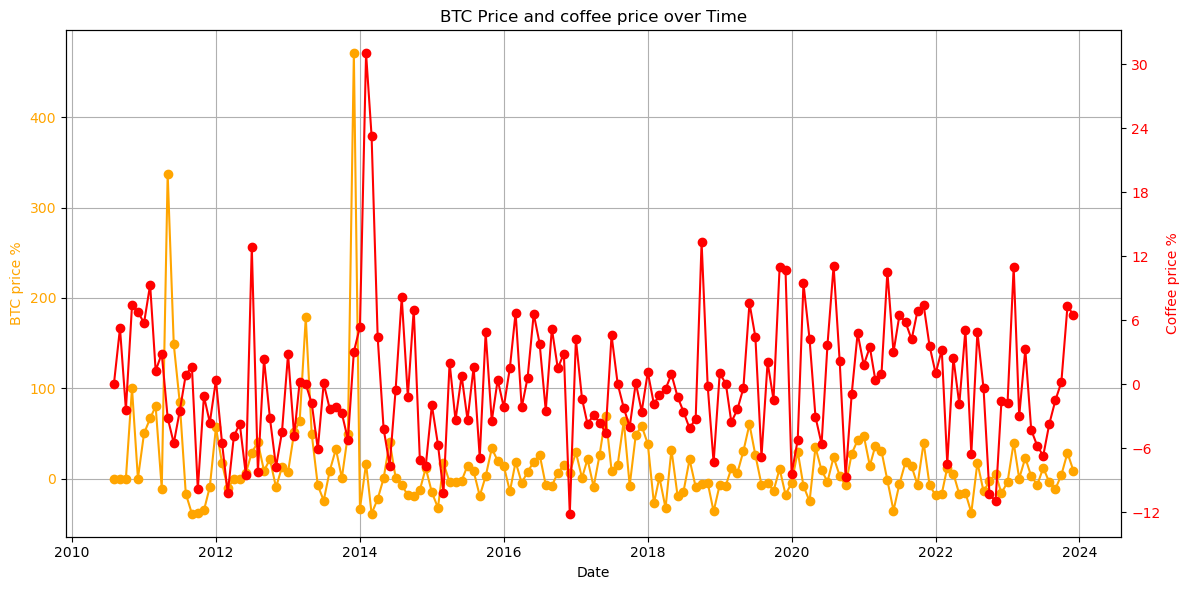

In [238]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# First y (BTC price)
ax1.plot(result["Date"], result["change_btc%"], color='orange', label='BTC price %', marker="o", linestyle="-")
ax1.set_xlabel("Date")
ax1.set_ylabel("BTC price %", color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Second y (CPI) sharing x
ax2 = ax1.twinx()
ax2.plot(result["Date"], result["change_coffee_price%"], color='red', label='Coffee price %', marker="o", linestyle="-")
ax2.set_ylabel("Coffee price %", color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax2.yaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=8))

plt.title("BTC Price and coffee price over Time")
plt.xticks(rotation=45)
ax1.grid(True)

plt.tight_layout()
plt.show()

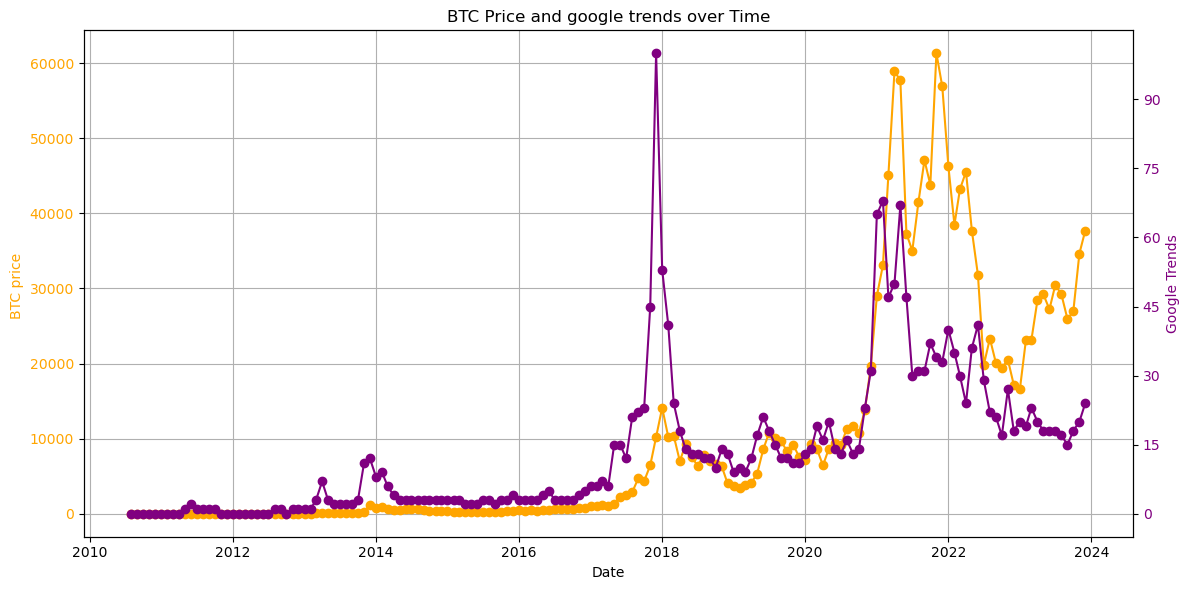

In [237]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# First y (BTC price)
ax1.plot(result["Date"], result["Open"], color='orange', label='BTC price', marker="o", linestyle="-")
ax1.set_xlabel("Date")
ax1.set_ylabel("BTC price ", color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Second y (CPI) sharing x
ax2 = ax1.twinx()
ax2.plot(result["Date"], result["google_trends_btc"], color='purple', label='Coffee price %', marker="o", linestyle="-")
ax2.set_ylabel("Google Trends", color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

ax2.yaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=8))

plt.title("BTC Price and google trends over Time")
plt.xticks(rotation=45)
ax1.grid(True)

plt.tight_layout()
plt.show()